# TP 1 Algoritmos 2


In [79]:
# classe para representar pontos bidimensionais no espaço
class Ponto:
    def __init__(self, x, y):
        self.x = x
        self.y = y

#calculando o produto vetorial entre segmentos ab e ac, a = ancora
def produto_vetorial(ancora, b, c):
    return ((b.x-ancora.x)*(c.y-ancora.y) - (c.x-ancora.x)*(b.y-ancora.y))

# encontrando o ponto mais embaixo em relação a y
def mais_a_esquerda(pontos):
    min = 0
    for i in range(1,len(pontos)):
        if pontos[i].y < pontos[min].y:
            min = i
        elif pontos[i].y == pontos[min].y:
            if pontos[i].x < pontos[min].x: # em caso de empate, escolhemos o ponto mais a esquerda
                min = i
    return min

#coloquei a classe segment aqui porque usei pra criar a lista de pontos
class Segment:
    def __init__(self, left, right):
        self.left = left
        self.right = right

In [80]:
# funcao que recebe um vetor de pontos, e retorna lista ocm pontos da envoltoria convexa
def gift_wrapping(pontos):
    i_esquerda = mais_a_esquerda(pontos) # guarda indice do ponto mais a esquerda
    p = pontos[i_esquerda]

    prox = (i_esquerda + 1) % len(pontos)

    teste = (prox + 1) % len(pontos)

    envoltoria = [] #incializa envoltoria vazia
    envoltoria.append(p) # adiciona ponto mais à esquerda a envoltoria

    q = p
    while(True):
        while(teste != len(pontos)):

            det = produto_vetorial(q, pontos[prox], pontos[teste])
            if det < 0: # se for negativo, pontos[teste] tem o menor angulo polar
                prox = teste
            teste = teste+1;

        # se
        if p == pontos[prox]:
            break
        elif teste == len(pontos):
            teste == 0;

        envoltoria.append(pontos[prox])
        q = pontos[prox]
        prox = (prox + 1) % len(pontos)
        teste =0
    return envoltoria

points = []
points.append(Ponto(0, 3))
points.append(Ponto(2, 2))
points.append(Ponto(1, 1))
points.append(Ponto(2, 1))
points.append(Ponto(3, 0))
points.append(Ponto(0, 0))
points.append(Ponto(3, 3))

envoltoria = gift_wrapping(points)


In [81]:
# Acessando atributos dos objetos na lista
for ponto in envoltoria:
    print(f"X: {ponto.x}, Y: {ponto.y}")


X: 0, Y: 0
X: 3, Y: 0
X: 3, Y: 3
X: 0, Y: 3


resposta esperada:
(0, 3)
(0, 0)
(3, 0)
(3, 3)

Left Point: (0, 3), Right Point: (2, 2)
Left Point: (2, 2), Right Point: (1, 1)
Left Point: (1, 1), Right Point: (2, 1)
Left Point: (2, 1), Right Point: (3, 0)
Left Point: (3, 0), Right Point: (0, 0)
Left Point: (0, 0), Right Point: (3, 3)
Left Point: (3, 3), Right Point: (0, 3)


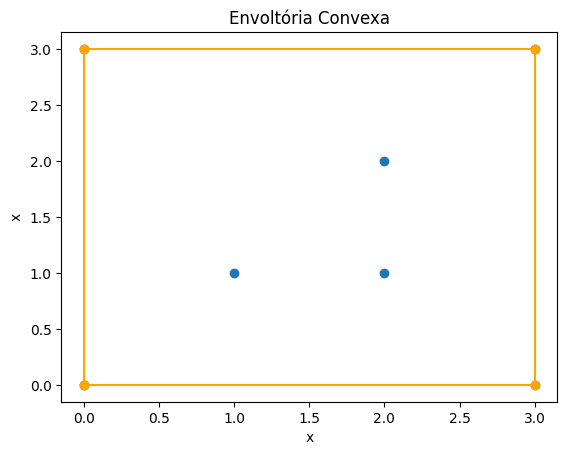

In [85]:
import matplotlib.pyplot as plt

# Criando listas separadas para nomes e idades
Xs1 = [ponto.x for ponto in points]
Ys1 = [ponto.y for ponto in points]

Xs2 = [ponto.x for ponto in envoltoria]
Ys2 = [ponto.y for ponto in envoltoria]

# Adicionando o primeiro ponto da envoltória ao final para fechar a forma
Xs2.append(envoltoria[0].x)
Ys2.append(envoltoria[0].y)



# Plotando um gráfico de barras
plt.scatter(Xs1, Ys1)
plt.plot(Xs2, Ys2, linestyle='-', marker='o', color='orange')
plt.xlabel('x')
plt.ylabel('x')
plt.title('Envoltória Convexa')
plt.show()


X: 0.8289400292173631, Y: 0.004695476192547066
X: 0.9883738380592262, Y: 0.10204481074802807
X: 0.978618342232764, Y: 0.7991585642167236
X: 0.7781567509498505, Y: 0.8700121482468192
X: 0.5759464955561793, Y: 0.9292961975762141
X: 0.1433532874090464, Y: 0.9446689170495839
X: 0.02021839744032572, Y: 0.832619845547938
X: 0.018789800436355142, Y: 0.6176354970758771
X: 0.07103605819788694, Y: 0.08712929970154071
X: 0.5865129348100832, Y: 0.020107546187493552
Left Point: (0.5488135039273248, 0.7151893663724195), Right Point: (0.6027633760716439, 0.5448831829968969)
Left Point: (0.6027633760716439, 0.5448831829968969), Right Point: (0.4236547993389047, 0.6458941130666561)
Left Point: (0.4236547993389047, 0.6458941130666561), Right Point: (0.4375872112626925, 0.8917730007820798)
Left Point: (0.4375872112626925, 0.8917730007820798), Right Point: (0.9636627605010293, 0.3834415188257777)
Left Point: (0.9636627605010293, 0.3834415188257777), Right Point: (0.7917250380826646, 0.5288949197529045)
Le

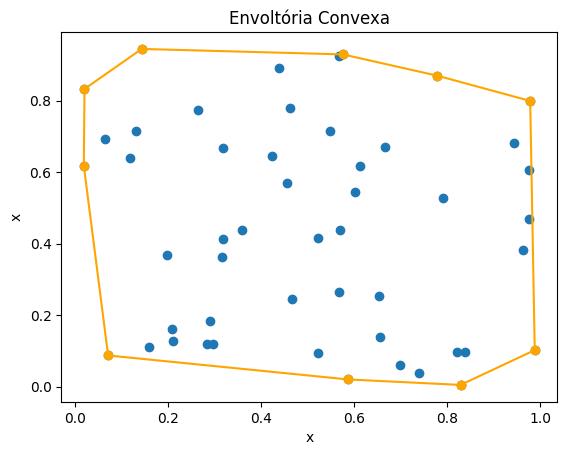

In [102]:
# Gerar alguns pontos de exemplo

import numpy as np

np.random.seed(0)
numpy_points = np.random.rand(50, 2)  # 30 pontos em 2D


# Transformar pontos numpy em objetos Ponto
pontos = [Ponto(x, y) for x, y in numpy_points]
envoltoria = gift_wrapping(pontos)

 # Connect the last and first points

# Criando listas separadas para nomes e idades
Xs1 = [ponto.x for ponto in pontos]
Ys1 = [ponto.y for ponto in pontos]

Xs2 = [ponto.x for ponto in envoltoria]
Ys2 = [ponto.y for ponto in envoltoria]

# Adicionando o primeiro ponto da envoltória ao final para fechar a forma
Xs2.append(envoltoria[0].x)
Ys2.append(envoltoria[0].y)


#esses sao os pontos usados na varredura
line_segments = [Segment(pontos[i], pontos[i+1]) for i in range(len(pontos)-1)]
line_segments.append(Segment(pontos[-1], pontos[0]))

for p in envoltoria:
    print(f"X: {p.x}, Y: {p.y}")

#estao sendo dispostos aqui
for segment in line_segments:
    print(f"Left Point: ({segment.left.x}, {segment.left.y}), Right Point: ({segment.right.x}, {segment.right.y})")

# Plotando um gráfico de barras
plt.scatter(Xs1, Ys1)
plt.plot(Xs2, Ys2, linestyle='-', marker='o', color='orange')
plt.xlabel('x')
plt.ylabel('x')
plt.title('Envoltória Convexa')
plt.show()

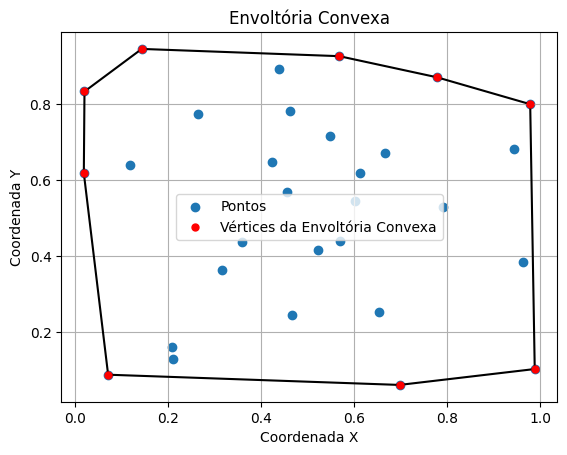

In [103]:
#funcao em python que resolve o problema da envoltoria automaticamente (util para verificar o funcinamento do giftwrapping)

from scipy.spatial import ConvexHull

# Gerar alguns pontos de exemplo
np.random.seed(0)
points = np.random.rand(30, 2)  # 30 pontos em 2D

# Calcular a envoltória convexa
hull = ConvexHull(points)

# Plotar os pontos
plt.scatter(points[:, 0], points[:, 1], label='Pontos')

# Plotar a envoltória convexa
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')

# Destacar os vértices da envoltória convexa
plt.plot(points[hull.vertices, 0], points[hull.vertices, 1], 'r.', markersize=10, label='Vértices da Envoltória Convexa')

# Configurações adicionais do gráfico
plt.title('Envoltória Convexa')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.legend()
plt.grid(True)
plt.show()


In [110]:
# A point in 2D plane
import bisect
# Começa aqui. #Rafa

# An event for sweep line algorithm
# An event has a point, the position
# of point (whether left or right) and
# index of point in the original input
# array of segments.
class Event:
    def __init__(self, x, y, isLeft, index):
        self.x = x
        self.y = y
        self.isLeft = isLeft
        self.index = index

    # This is for maintaining the order in set.
    def __lt__(self, e):
        if self.y == e.y:
            return self.x < e.x
        return self.y < e.y

# Given three collinear points p, q, r, the function checks if
# point q lies on line segment 'pr'
def onSegment(p, q, r):
    if (q.x <= max(p.x, r.x) and q.x >= min(p.x, r.x) and
        q.y <= max(p.y, r.y) and q.y >= min(p.y, r.y)):
        return True
    return False

# To find orientation of ordered triplet (p, q, r).
# The function returns following values
# 0 --> p, q and r are collinear
# 1 --> Clockwise
# 2 --> Counterclockwise
def orientation(p, q, r):
    val = (q.y - p.y) * (r.x - q.x) - (q.x - p.x) * (r.y - q.y)
    if val == 0:
        return 0  # collinear
    return 1 if val > 0 else 2  # clock or counterclock wise

# The main function that returns true if line segment 'p1q1'
# and 'p2q2' intersect.
def doIntersect(s1, s2):
    p1, q1, p2, q2 = s1.left, s1.right, s2.left, s2.right

    # Find the four orientations needed for general and
    # special cases
    o1 = orientation(p1, q1, p2)
    o2 = orientation(p1, q1, q2)
    o3 = orientation(p2, q2, p1)
    o4 = orientation(p2, q2, q1)

    # General case
    if o1 != o2 and o3 != o4:
        return True

    # Special Cases
    # p1, q1 and p2 are collinear and p2 lies on segment p1q1
    if o1 == 0 and onSegment(p1, p2, q1):
        return True

    # p1, q1 and q2 are collinear and q2 lies on segment p1q1
    if o2 == 0 and onSegment(p1, q2, q1):
        return True

    # p2, q2 and p1 are collinear and p1 lies on segment p2q2
    if o3 == 0 and onSegment(p2, p1, q2):
        return True

    # p2, q2 and q1 are collinear and q1 lies on segment p2q2
    if o4 == 0 and onSegment(p2, q1, q2):
        return True

    return False  # Doesn't fall in any of the above cases


# Find predecessor of iterator in s.
    # index = sorted(s).index(it)
    # return sorted(s)[index - 1] if index > 0 else None
# Find predecessor of iterator in s.
def pred(s, it):
    prev_elem = None
    for elem in s:
        if elem.x == it.x and elem.y == it.y and elem.isLeft:
            return prev_elem
        if elem.isLeft:
            prev_elem = elem
    return None


# Find successor of iterator in s.
    # index = sorted(s).index(it)
    # return sorted(s)[index + 1] if index < len(s) - 1 else None
    # Find successor of iterator in s.
def succ(s, it):
    for elem in s:
        if elem.x == it.x and elem.y == it.y and elem.isLeft:
            next_elem = None
            for e in s:
                if e.x > it.x or (e.x == it.x and e.y > it.y):
                    if next_elem is None or (e.x < next_elem.x or (e.x == next_elem.x and e.y < next_elem.y)):
                        next_elem = e
            return next_elem
    return None



# Returns true if any two lines intersect.
def isIntersect(arr, n):
    mp = {}  # Dicionário para manter o registro dos pares para os quais a interseção já foi verificada

    # Adiciona todos os pontos a um veotr de eventos
    e = []
    for i in range(n):
        e.append(Event(arr[i].left.x, arr[i].left.y, True, i))
        e.append(Event(arr[i].right.x, arr[i].right.y, False, i))

    # Ordena todos os eventos de acordo com a coordenada x.
    e.sort(key=lambda x: x.x)

    # Para armazenar os segmentos ativos.
    s = set()

    ans = 0  # Inicializa o contador de interseções
    intersection_points = []  # Inicializa uma lista vazia para armazenar os pontos de intersecao

    for i in range(2 * n):
        curr = e[i]
        index = curr.index

        if curr.isLeft:
            next = succ(s, curr)  # Encontra o próximo segmento ativo
            prev = pred(s, curr)  # Encontra o segmento ativo anterior
            flag = False
            if next is not None and doIntersect(arr[next.index], arr[index]):
                intersection_points.append((arr[next.index].left, arr[index].left))
                # Se o próximo segmento ativo se intersecta com o segmento atual, adiciona o ponto de intersecao a lista
            if prev is not None and doIntersect(arr[prev.index], arr[index]):
                intersection_points.append((arr[prev.index].left, arr[index].left))
                # Se o segmento ativo anterior se intersecta com o segmento atual, adiciona o ponto de intersecao a lista
            if prev is not None and next is not None and next.index == prev.index:
                ans -= 1
                # Se o próximo e o anterior forem os mesmos segmentos, significa que o ponto de interseção foi contado duas vezes, então decrementa o contador de interseções

            s.add(curr)  # Adiciona o segmento atual ao conjunto de semgentos ativos
        else:
            it = None
            for elem in s:
                if elem.x == arr[index].left.x and elem.y == arr[index].left.y and elem.isLeft:
                    it = elem
                    break
                # Encontra o iterador correspondente ao segmento atual no conjunto de segmentos ativos
            if it is not None:
                next = succ(s, it)  # encontra o próximo segmento ativo
                prev = pred(s, it)  # encontra o segmento ativo anterior

                if next is not None and prev is not None:
                    if doIntersect(arr[prev.index], arr[next.index]):
                        intersection_points.append((arr[prev.index].left, arr[next.index].left))
                        # Se o segmento ativo anterior e o próximo se intersectam, adiciona o ponto de interseção a lista

                s.remove(it)  # remove o segmento atual do conjunto de segmentos ativos

    return intersection_points, ans  # Retorna a lista de pontos de interseção e a contagem de interseções

#n = len(line_segments)
#print(f"Number of intersection points: {isIntersect(line_segments, n)}")
n = len(line_segments)
intersection_points, count = isIntersect(line_segments, n)


In [114]:
n = len(line_segments)
intersection_points, count = isIntersect(line_segments, n)

for point_pair in intersection_points:
    print(f"Intersection Point 1: ({point_pair[0].x}, {point_pair[0].y}), Intersection Point 2: ({point_pair[1].x}, {point_pair[1].y})")
    # plt.scatter((point_pair[0].x,point_pair[0].y), (point_pair[1].x,point_pair[1].y) )
    # plt.plot((point_pair[0].x,point_pair[0].y), (point_pair[1].x,point_pair[1].y), linestyle='-', marker='o', color='orange')
    # plt.xlabel('x')
    # plt.ylabel('x')
    # plt.title('Envoltória Convexa')
    # plt.scatter(Xs1, Ys1)
    # plt.plot(Xs2, Ys2, linestyle='-', marker='o', color='orange')
    # plt.xlabel('x')
    # plt.ylabel('x')
    # plt.show()

#comentei porque isso plota os pontos e uma reta mostrando q eles se interceptam


Intersection Point 1: (0.26455561210462697, 0.7742336894342167), Intersection Point 2: (0.1433532874090464, 0.9446689170495839)
Intersection Point 1: (0.2088767560948347, 0.16130951788499626), Intersection Point 2: (0.2894060929472011, 0.18319136200711683)
Intersection Point 1: (0.4663107728563063, 0.24442559200160274), Intersection Point 2: (0.15896958364551972, 0.11037514116430513)
Intersection Point 1: (0.07103605819788694, 0.08712929970154071), Intersection Point 2: (0.07103605819788694, 0.08712929970154071)
Intersection Point 1: (0.4375872112626925, 0.8917730007820798), Intersection Point 2: (0.02021839744032572, 0.832619845547938)
Intersection Point 1: (0.317983179393976, 0.41426299451466997), Intersection Point 2: (0.45615033221654855, 0.5684339488686485)
Intersection Point 1: (0.5680445610939323, 0.925596638292661), Intersection Point 2: (0.5759464955561793, 0.9292961975762141)
